# 분류

## #01. 분류와 군집의 차이

분류와 군집은 모두 데이터를 특정한 집단으로 나눈다는 점에서 공통점이 있다.

| 이름 | 설명 | 구분 | 알고리즘 |
|---|---|---|---|
| 분류 | 소속집단의 정보를 이미 알고 있는 상태에서 새로운 데이터를 비슷한 집단으로 묶는 방법 | 지도학습 | KNN | 
| 군집 | 소속집단의 정보가 없는 상타에서 비슷한 집단으로 묶는 방법 | 비지도학습 | K-means |
## #02. 분류 예제 

> 산점도 그래프의 위쪽에 분포한 녹색점은 진돗개이고, 아래쪽에 붉은 점은 닥스훈트임

### 1. K-NN 알고리즘(K 최근접 이웃)

특정 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결의 방식으로 데이터 레이블을 할당하는 분류 방식

### 2. K-NN의 특징

- K-NN 알고리즘은 k의 값에 따라 결과가 달라진다
- 단순히 이웃의 수를 계산하는 것이 아니라, 이웃과의 거리에 가중치를 부여하는 모델을 만들 수 있다. 
- 알고리즘이 매우 단순하고 직관적임.
## #03. 패키지 참조


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


## #04. 데이터 가져오기

In [2]:
origin = pd.read_excel('https://data.hossam.kr/G02/dogs.xlsx')
origin.head()

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33


## #05. 데이터 분포확인


In [3]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(5,5))



<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

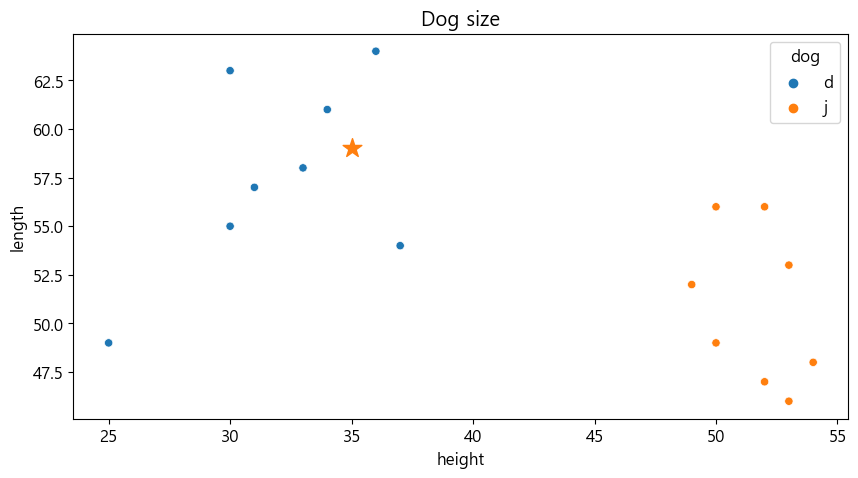

In [4]:
sb.scatterplot(data=origin,x='height',y='length',hue='dog')
plt.xlabel('height')
plt.ylabel('length')
plt.title('Dog size')

# 새로운 데이터
newdata_length = [59]
newdata_height = [35]

plt.scatter(newdata_height,newdata_length,marker='*',s=200)


plt.show()
plt.close()


## #06. K-NN 분류모델 구성
### 종속변수 라벨링

In [5]:
origin.head()

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33


In [6]:
df= origin.copy()
df['dog'] = origin['dog'].map({'d':0,'j':1})
df.head()

,dog,length,height
0,0,55,30
1,0,57,31
2,0,64,36
3,0,63,30
4,0,58,33


### 독립 & 종속변수 분리

In [7]:
x = df.drop('dog',axis=1)
y= df[['dog']]


In [18]:
y.head()

,dog
0,0
1,0
2,0
3,0
4,0


### 분류 모델 구성

In [8]:
# 근접 이웃의 수를 3으로 설정
k=3 

# 모델 구성
knn = KNeighborsClassifier(n_neighbors=k)

# 모델학습
fit = knn.fit(x,y)


### 학습결과 확인


In [9]:
y_pred = knn.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### 새로운 데이터

In [10]:
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성해야 한다.
newdata_length = [59]
newdata_height = [35]
new_data = [[newdata_length[0], newdata_height[0]]]
dog_classes = {0:'닥스훈트', 1:'진돗개'}
new_pred = knn.predict(new_data)
print("데이터: ", new_data, ", 예측: ", dog_classes[new_pred[0]])


데이터:  [[59, 35]] , 예측:  닥스훈트


### knn 에서 이웃한 데이터 얻기 


In [11]:
dist, indexs = knn.kneighbors(new_data, k)
# 거리
print("거리: ", dist)
# 인덱스
print("인덱스: ", indexs)

거리:  [[2.23606798 2.23606798 4.47213595]]
인덱스:  [[4 7 1]]


### 이웃한 실 데이터 확인

In [12]:
neightbor_data = origin.values[indexs]
neightbor_data

array([[['d', 58, 33],
        ['d', 61, 34],
        ['d', 57, 31]]], dtype=object)

### 분류 결과 시각화

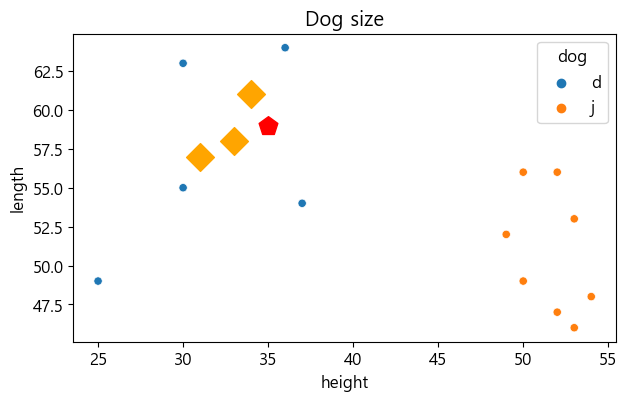

In [22]:
plt.figure(figsize=(7, 4))
sb.scatterplot(data=origin, x="height", y="length", hue="dog")
plt.xlabel("height")
plt.ylabel("length")
plt.title("Dog size")
# 새로운 데이터 투입
newdata_length = [59]
newdata_height = [35]
plt.scatter(newdata_height, newdata_length, marker="p", s=200, c="r")
            
# 근접 이웃 표시
for i, v in enumerate(neightbor_data[0]):
    plt.scatter(v[2], v[1], marker="D", s=200, c="orange", label='nei')
plt.show()
plt.close()

## #07. 데이터 표준화 적용
### 독립변수에 대한 표준화



In [17]:
scaler = StandardScaler()
std_x=scaler.fit_transform(x)


In [18]:
std_new_data = scaler.fit_transform(new_data)


### knn 분류기 생성

In [19]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(std_x, y)
y_pred = knn.predict(std_x)
print("측정치: ", y.values)
print("분류결과: ", y_pred)

측정치:  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
분류결과:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


### 새로운 분류 대상 투입

In [20]:
# 새로운 데이터에 대한 분류 결과
new_data_pred = knn.predict(std_new_data)
print("데이터: ", new_data_pred, ", 예측: ", dog_classes[new_data_pred[0]])
# 근접한 이웃의 거리와 인덱스
dist, indexs = knn.kneighbors(std_new_data, k)
print("거리: ", dist, ", 인덱스: ", indexs)

데이터:  [1] , 예측:  진돗개
거리:  [[0.47382423 0.81820122 0.86518845 1.04947585 1.10789834]] , 인덱스:  [[ 6 14 10  8  4]]


### 표준화 적용 결과와 분류 결과 시각화
#### 표준화 결과에 대한 임시 데이터 프레임 생서

In [21]:
tmp_df = pd.DataFrame(std_x,columns=['length','height'])
tmp_df['dog']=y
tmp_df

,length,height,dog
0,0.138823,-1.157463,0
1,0.509019,-1.059477,0
2,1.804705,-0.569546,0
3,1.619607,-1.157463,0
4,0.694117,-0.863505,0
5,-0.971764,-1.647395,0
6,-0.046274,-0.471559,0
7,1.249411,-0.765518,0
8,0.323921,0.998236,1
9,-1.341960,0.998236,1


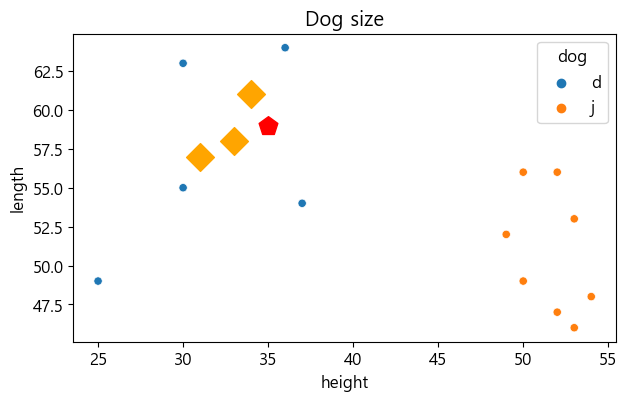

In [23]:
plt.figure(figsize=(7, 4))
sb.scatterplot(data=origin, x="height", y="length", hue="dog")
plt.xlabel("height")
plt.ylabel("length")
plt.title("Dog size")
# 새로운 데이터 투입
newdata_length = [59]
newdata_height = [35]
plt.scatter(newdata_height, newdata_length, marker="p", s=200, c="r")
            
# 근접 이웃 표시
for i, v in enumerate(neightbor_data[0]):
    plt.scatter(v[2], v[1], marker="D", s=200, c="orange", label='nei')
plt.show()
plt.close()